In [1]:
from pathlib import Path

notebook_path = Path().cwd().parent.parent.parent.parent
import sys

sys.path.insert(0, str(notebook_path))

import pandas as pd

from explore.gcp.storage import gcp
from explore.src.utilities.eda_funcs import describe_data
from explore.src.visualisation.exploratory_visuals import StatisticPlots
from explore.src.visualisation.wages_visual import WagesVisuals

import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [2]:
df = gcp.read_df_from_bucket(
    bucket_name="processed_fbref_db", blob_name="processed_Serie-A-wages.csv"
)

[03/21/24 18:58:59] INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:28 ] - Getting GCP bucket                                 ]8;id=945864;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=714132;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#28\28]8;;\

[03/21/24 18:59:00] INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:33 ] - GCP bucket retrieved                               ]8;id=193796;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=110290;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#33\33]8;;\

In [3]:
df.head()

,rk,player,nation,pos,squad,age,weekly_wages_euros,annual_wages_euros,notes,season,general_pos,age_range,country,continent,player_id
0,1,Leonardo Bonucci,ITA,DF,Milan,30,264231,13740000,Unverified estimation,2017-2018,Defender,30-34,Italy,Europe,318.0
1,2,Gonzalo Higuaín,ARG,FW,Juventus,29,264231,13740000,Unverified estimation,2017-2018,Forward,25-29,Argentina,South America,1036.0
2,3,Paulo Dybala,ARG,"MF,FW",Juventus,23,246731,12830000,Unverified estimation,2017-2018,Midfielder,20-24,Argentina,South America,702.0
3,4,Douglas Costa,BRA,"FW,MF",Juventus,26,211538,11000000,Unverified estimation,2017-2018,Forward,25-29,Brazil,South America,536.0
4,5,Gianluigi Donnarumma,ITA,GK,Milan,18,199808,10390000,Unverified estimation,2017-2018,Goalkeeper,Under 20,Italy,Europe,671.0


In [4]:
df.shape

(4349, 15)

In [5]:
describe_data(df)

,Data Types,Null Counts,Null %,Unique Values,Min,Max,Median,Mean,Std Dev,Outliers,Outliers %
rk,int64,0,0.00,789,1.0,789.0,311.0,316.17,188.49,0,0.00
age,int64,0,0.00,27,16.0,42.0,25.0,25.32,4.91,10,0.23
weekly_wages_euros,int64,0,0.00,377,154.0,1104038.0,17885.0,33422.58,48786.21,421,9.68
annual_wages_euros,int64,0,0.00,377,8000.0,57410000.0,930000.0,1737972.18,2536884.71,421,9.68
player_id,float64,424,9.75,1418,2.0,6293.0,2184.0,2426.54,1600.56,0,0.00


In [6]:
stat_plots = StatisticPlots(df)

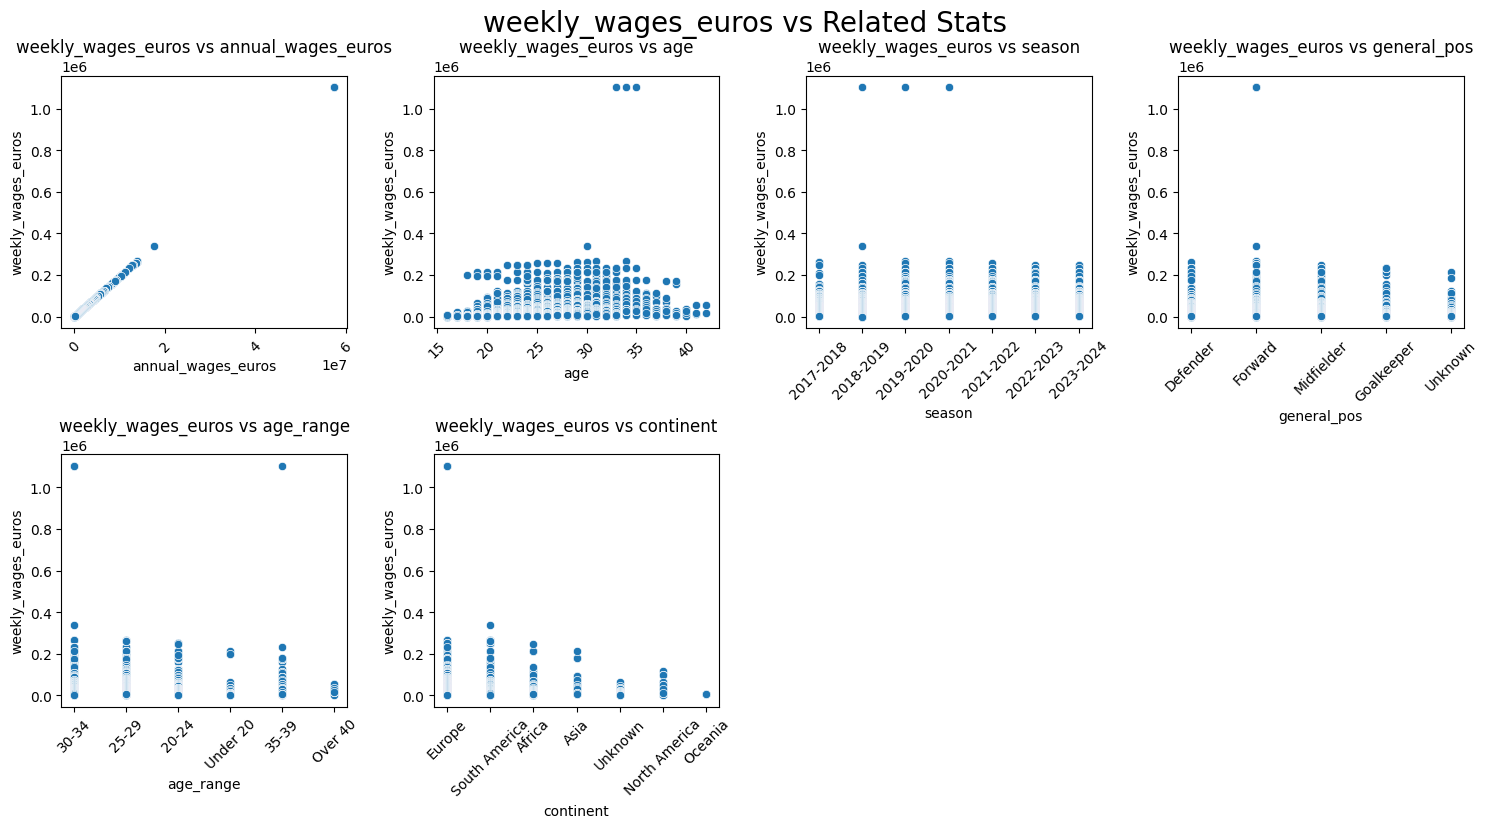

In [7]:
stat_plots.relationships(
    y="weekly_wages_euros",
    X=["annual_wages_euros", "age", "season", "general_pos", "age_range", "continent"],
)

In [8]:
wage_plots = WagesVisuals(df)

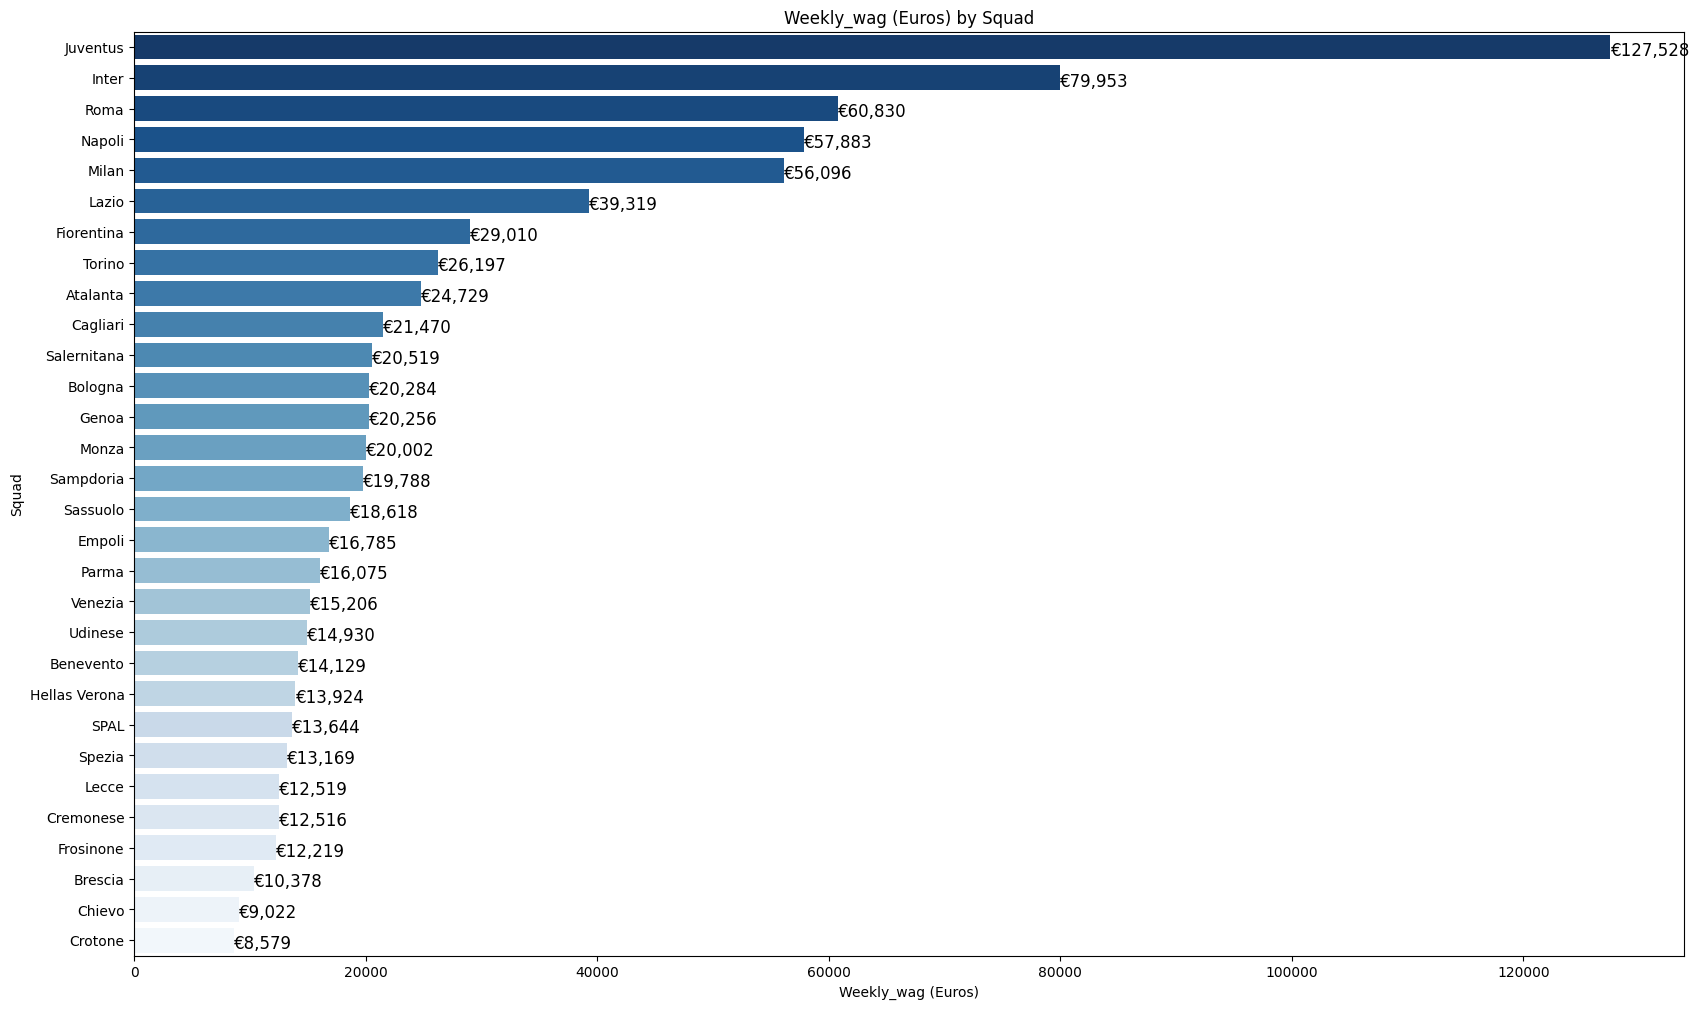

In [9]:
wage_plots.total_wage_avgs('squad')

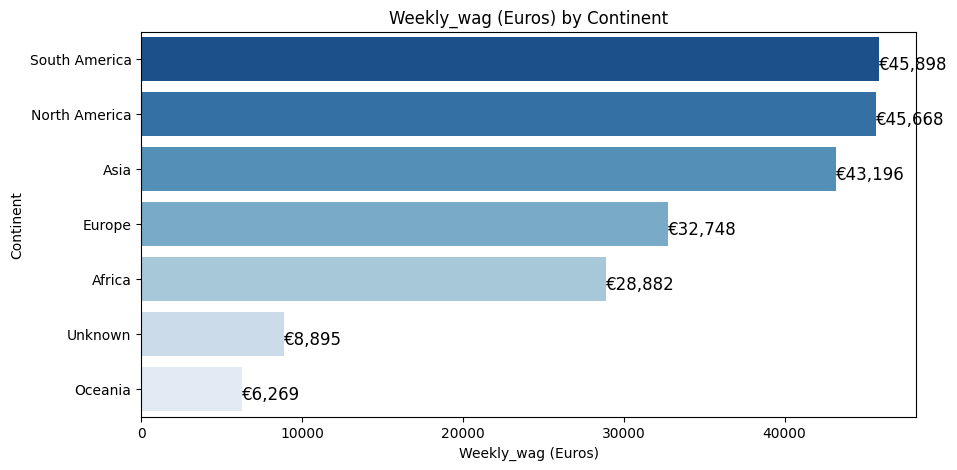

In [10]:
wage_plots.total_wage_avgs('continent', figsize=(10, 5))

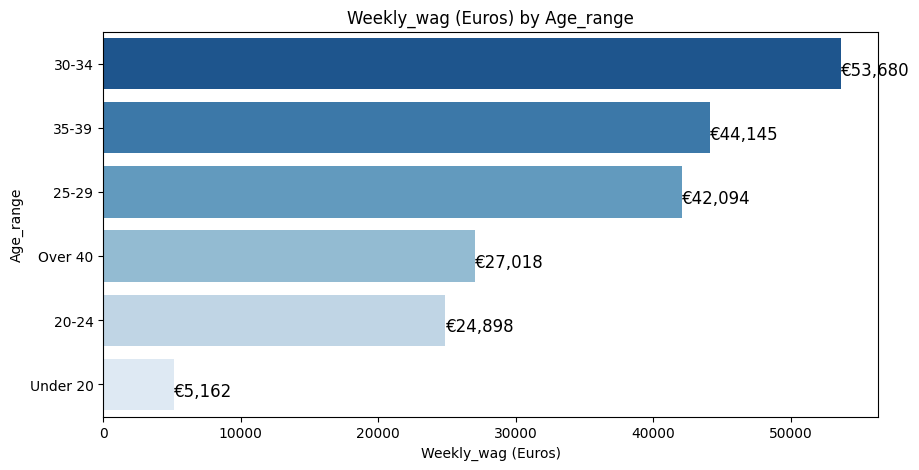

In [11]:
wage_plots.total_wage_avgs('age_range', figsize=(10, 5))

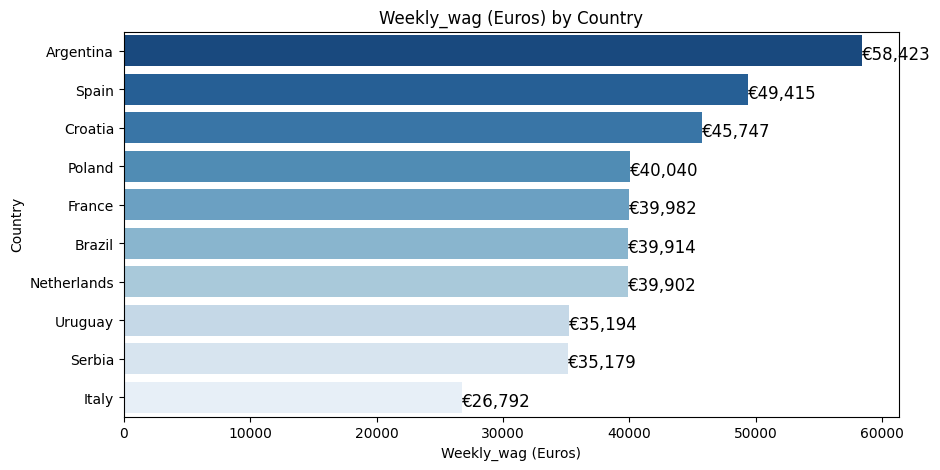

In [12]:
wage_plots.total_wage_avgs('country', figsize=(10, 5))

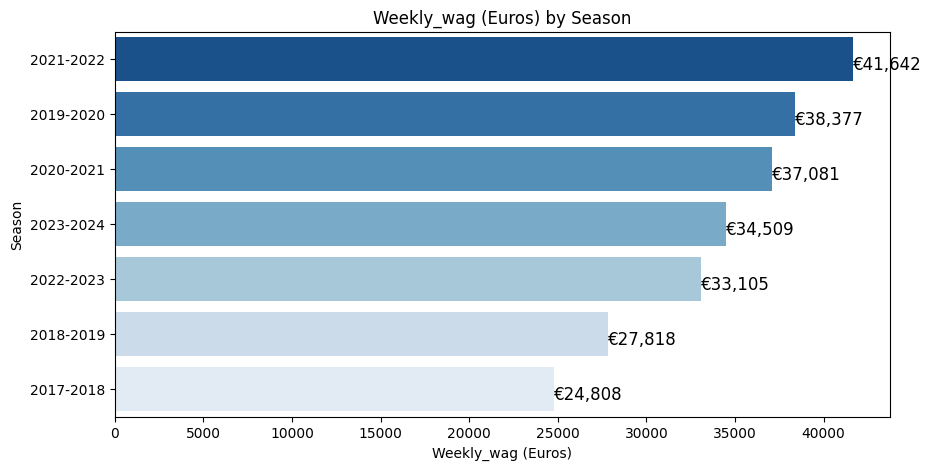

In [13]:
wage_plots.total_wage_avgs('season', figsize=(10, 5))

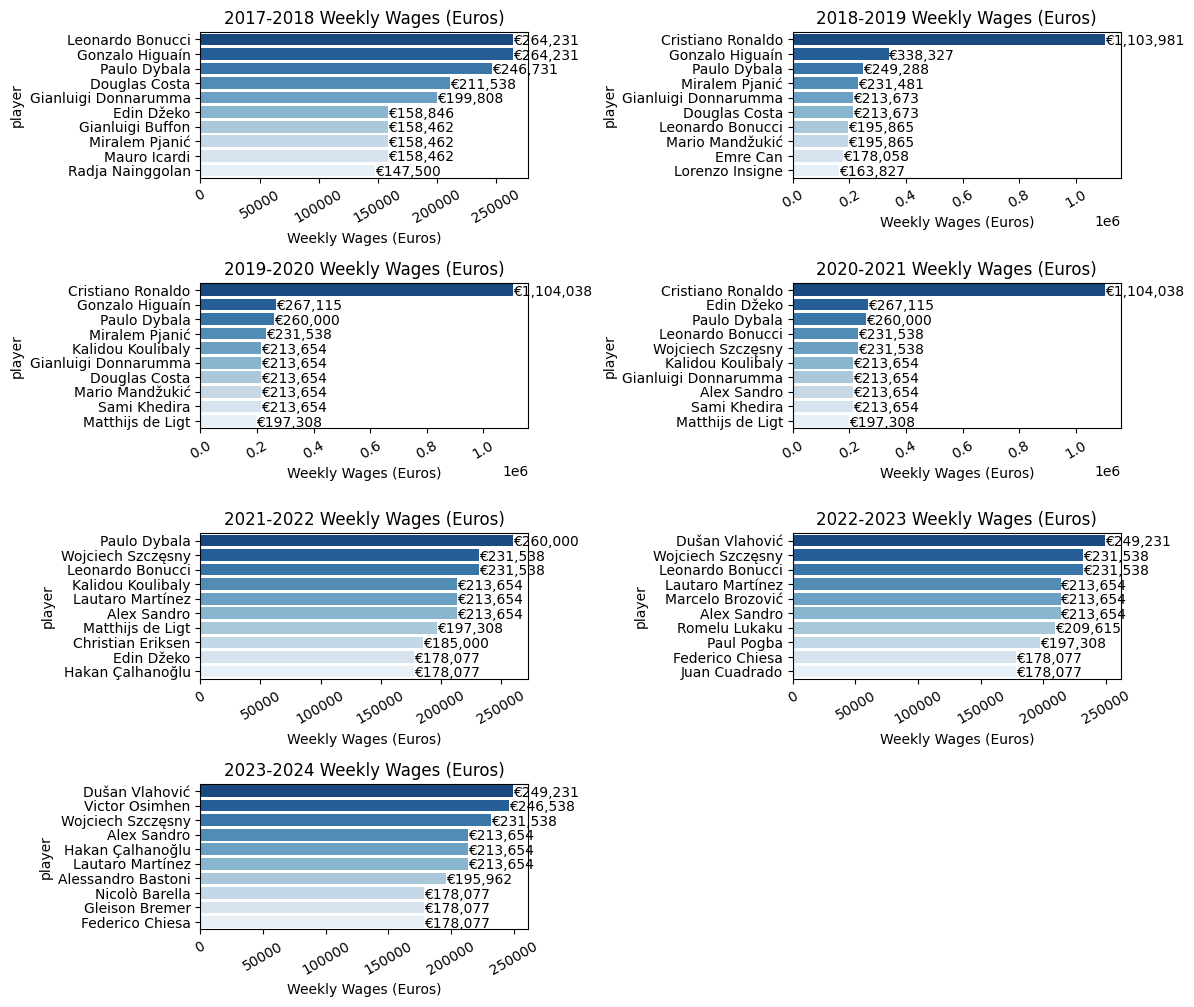

In [14]:
wage_plots.top_earners()

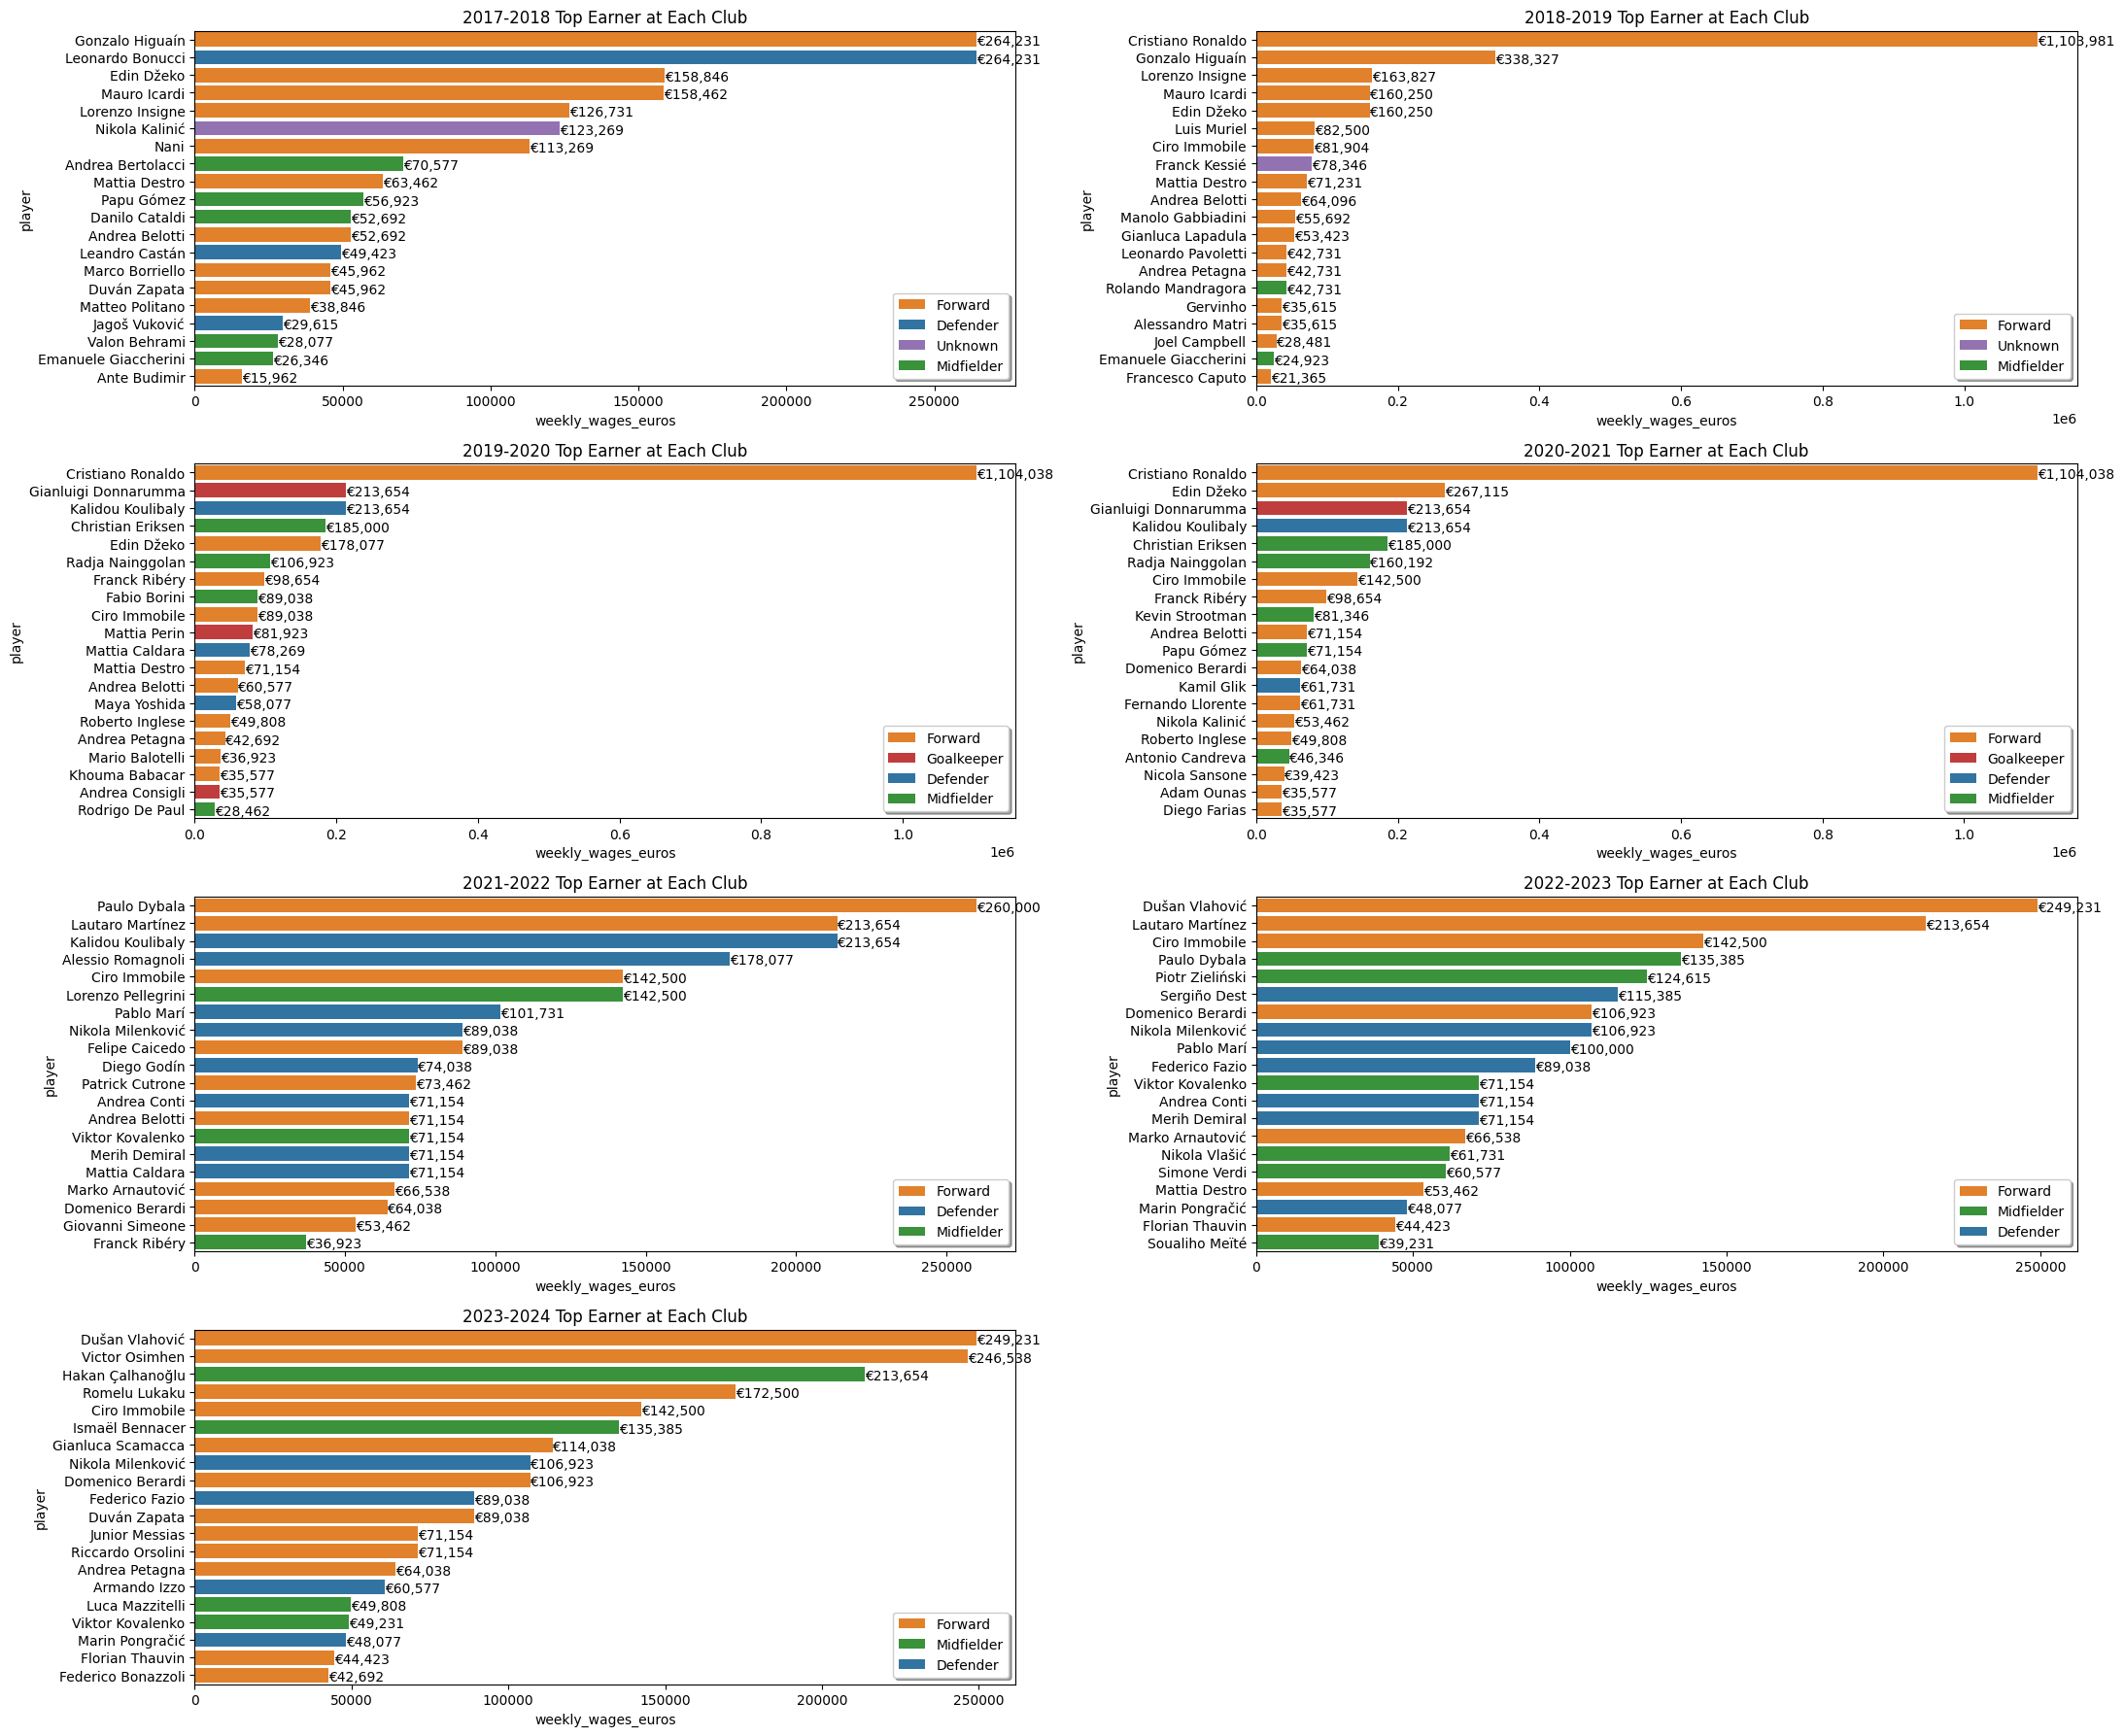

In [15]:
wage_plots.top_earners_season_var(hue='general_pos', yaxis_var='player')

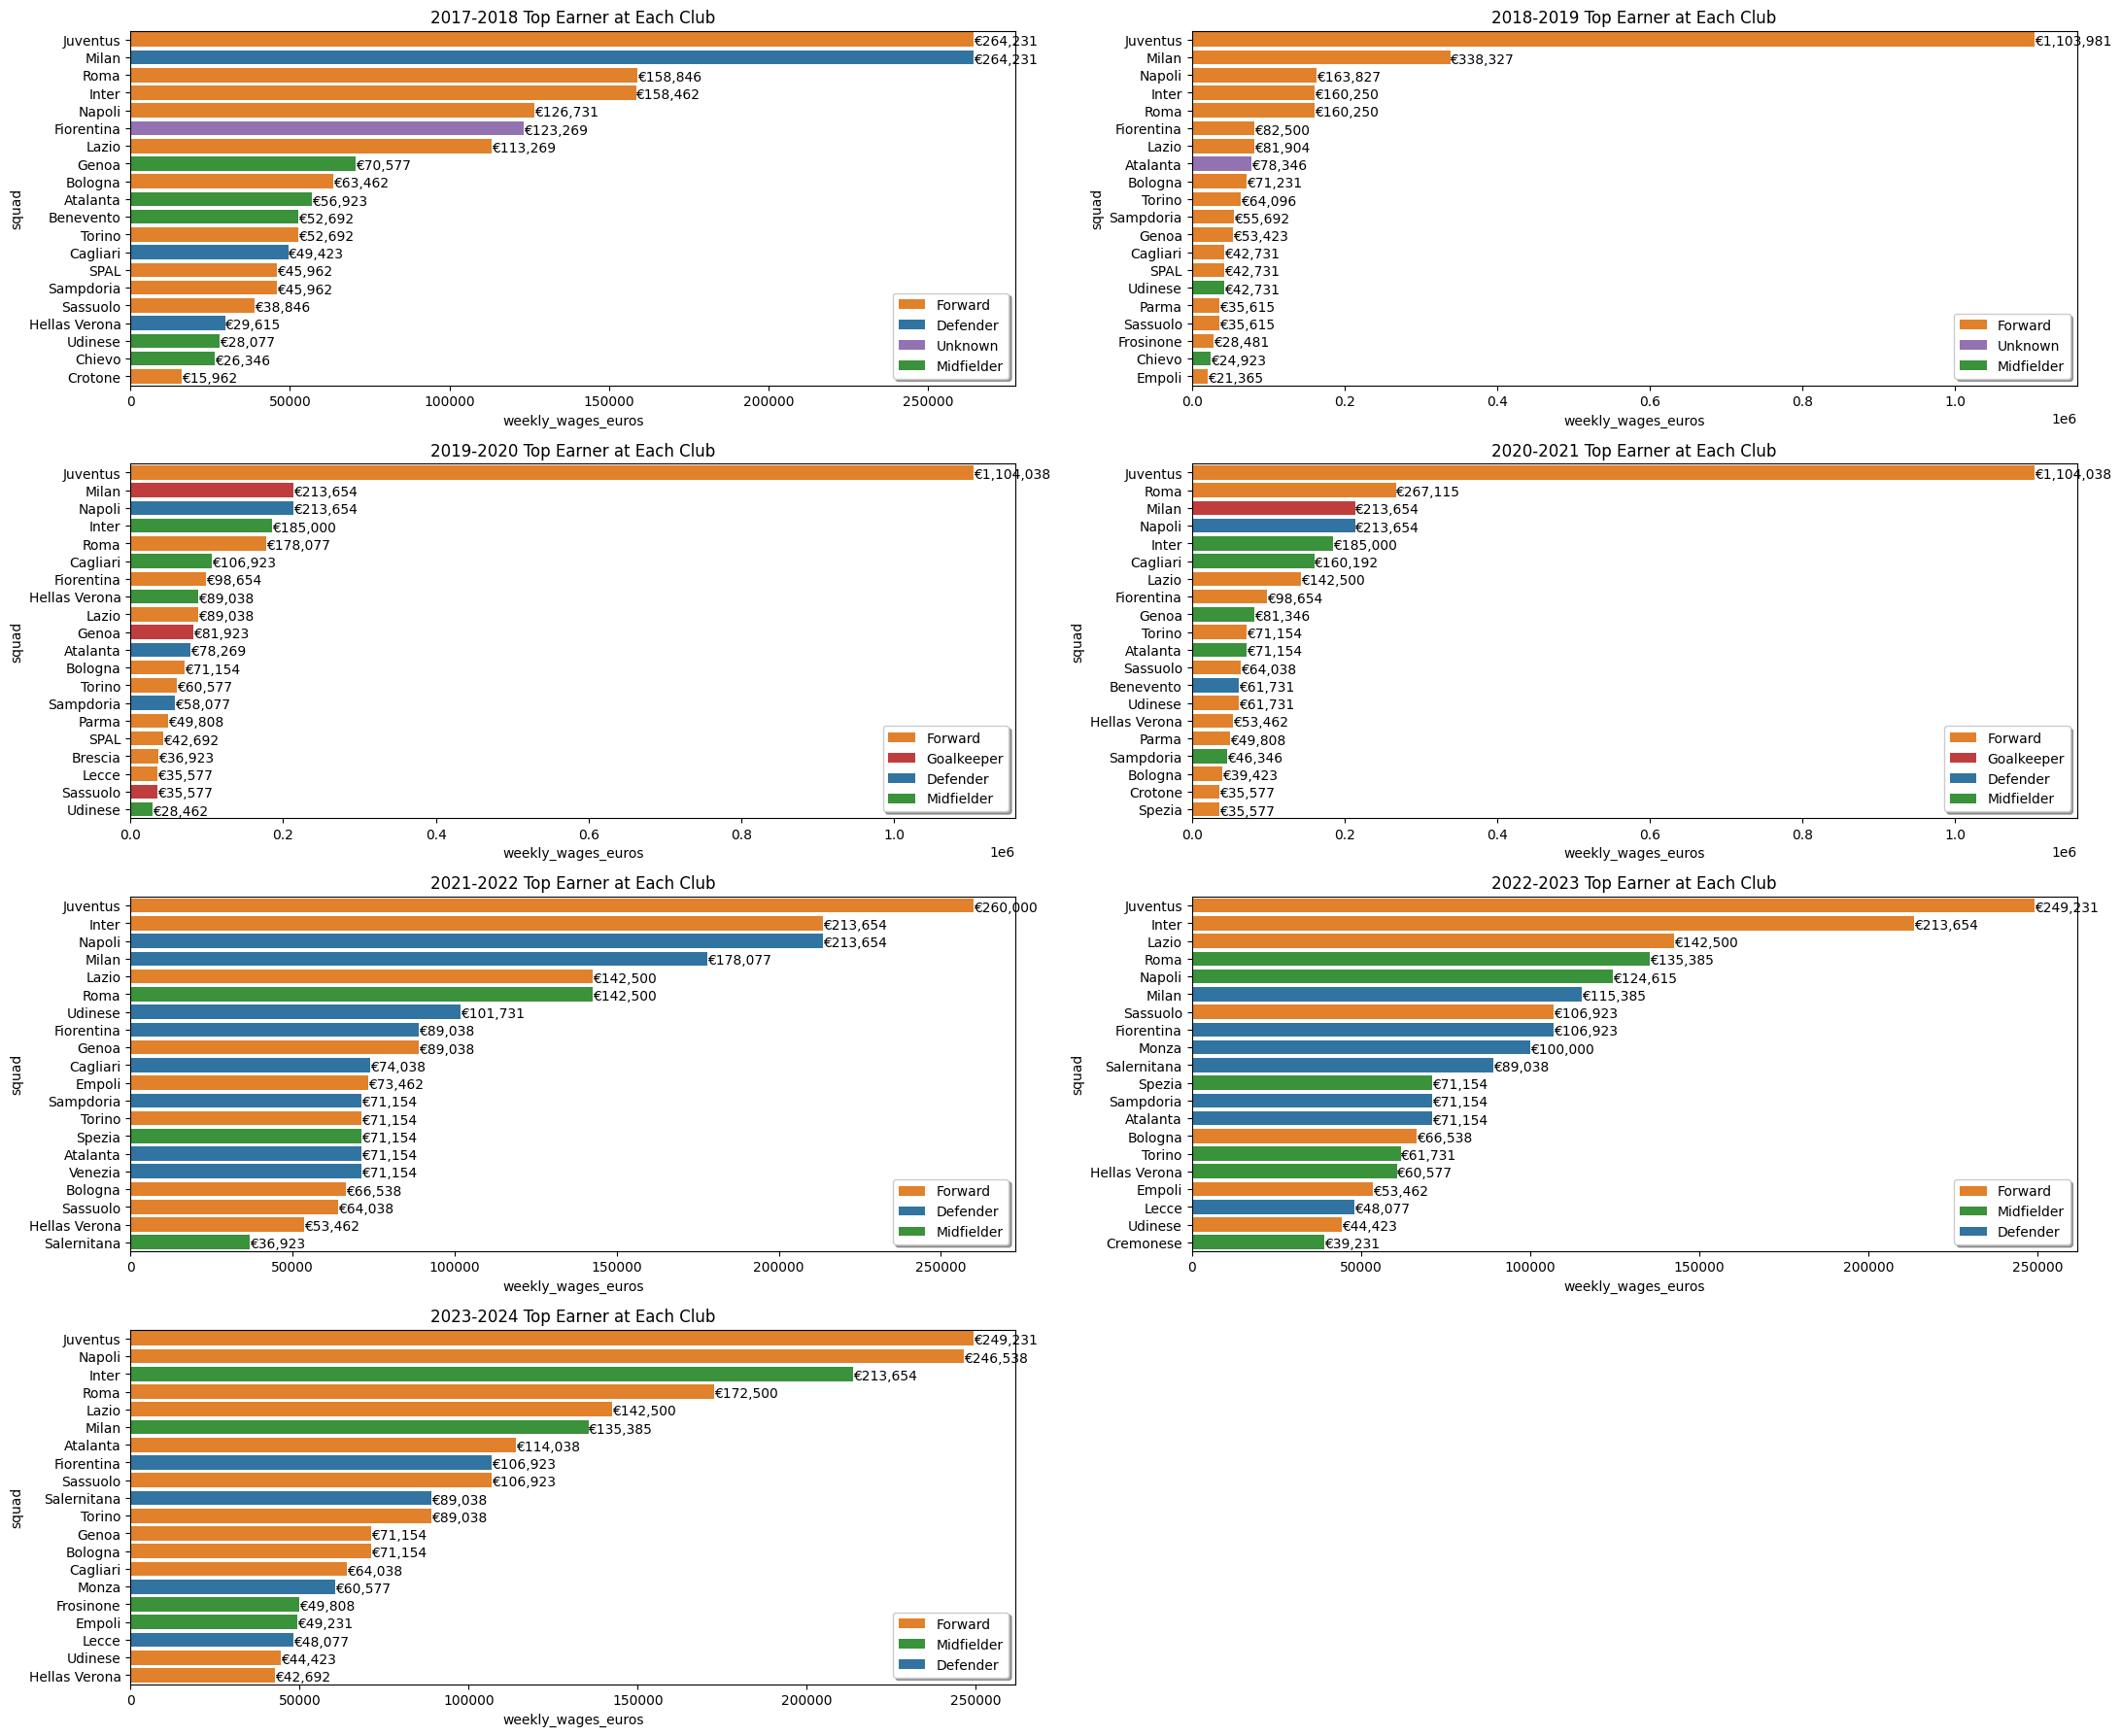

In [16]:
wage_plots.top_earners_season_var(hue='general_pos', yaxis_var='squad')

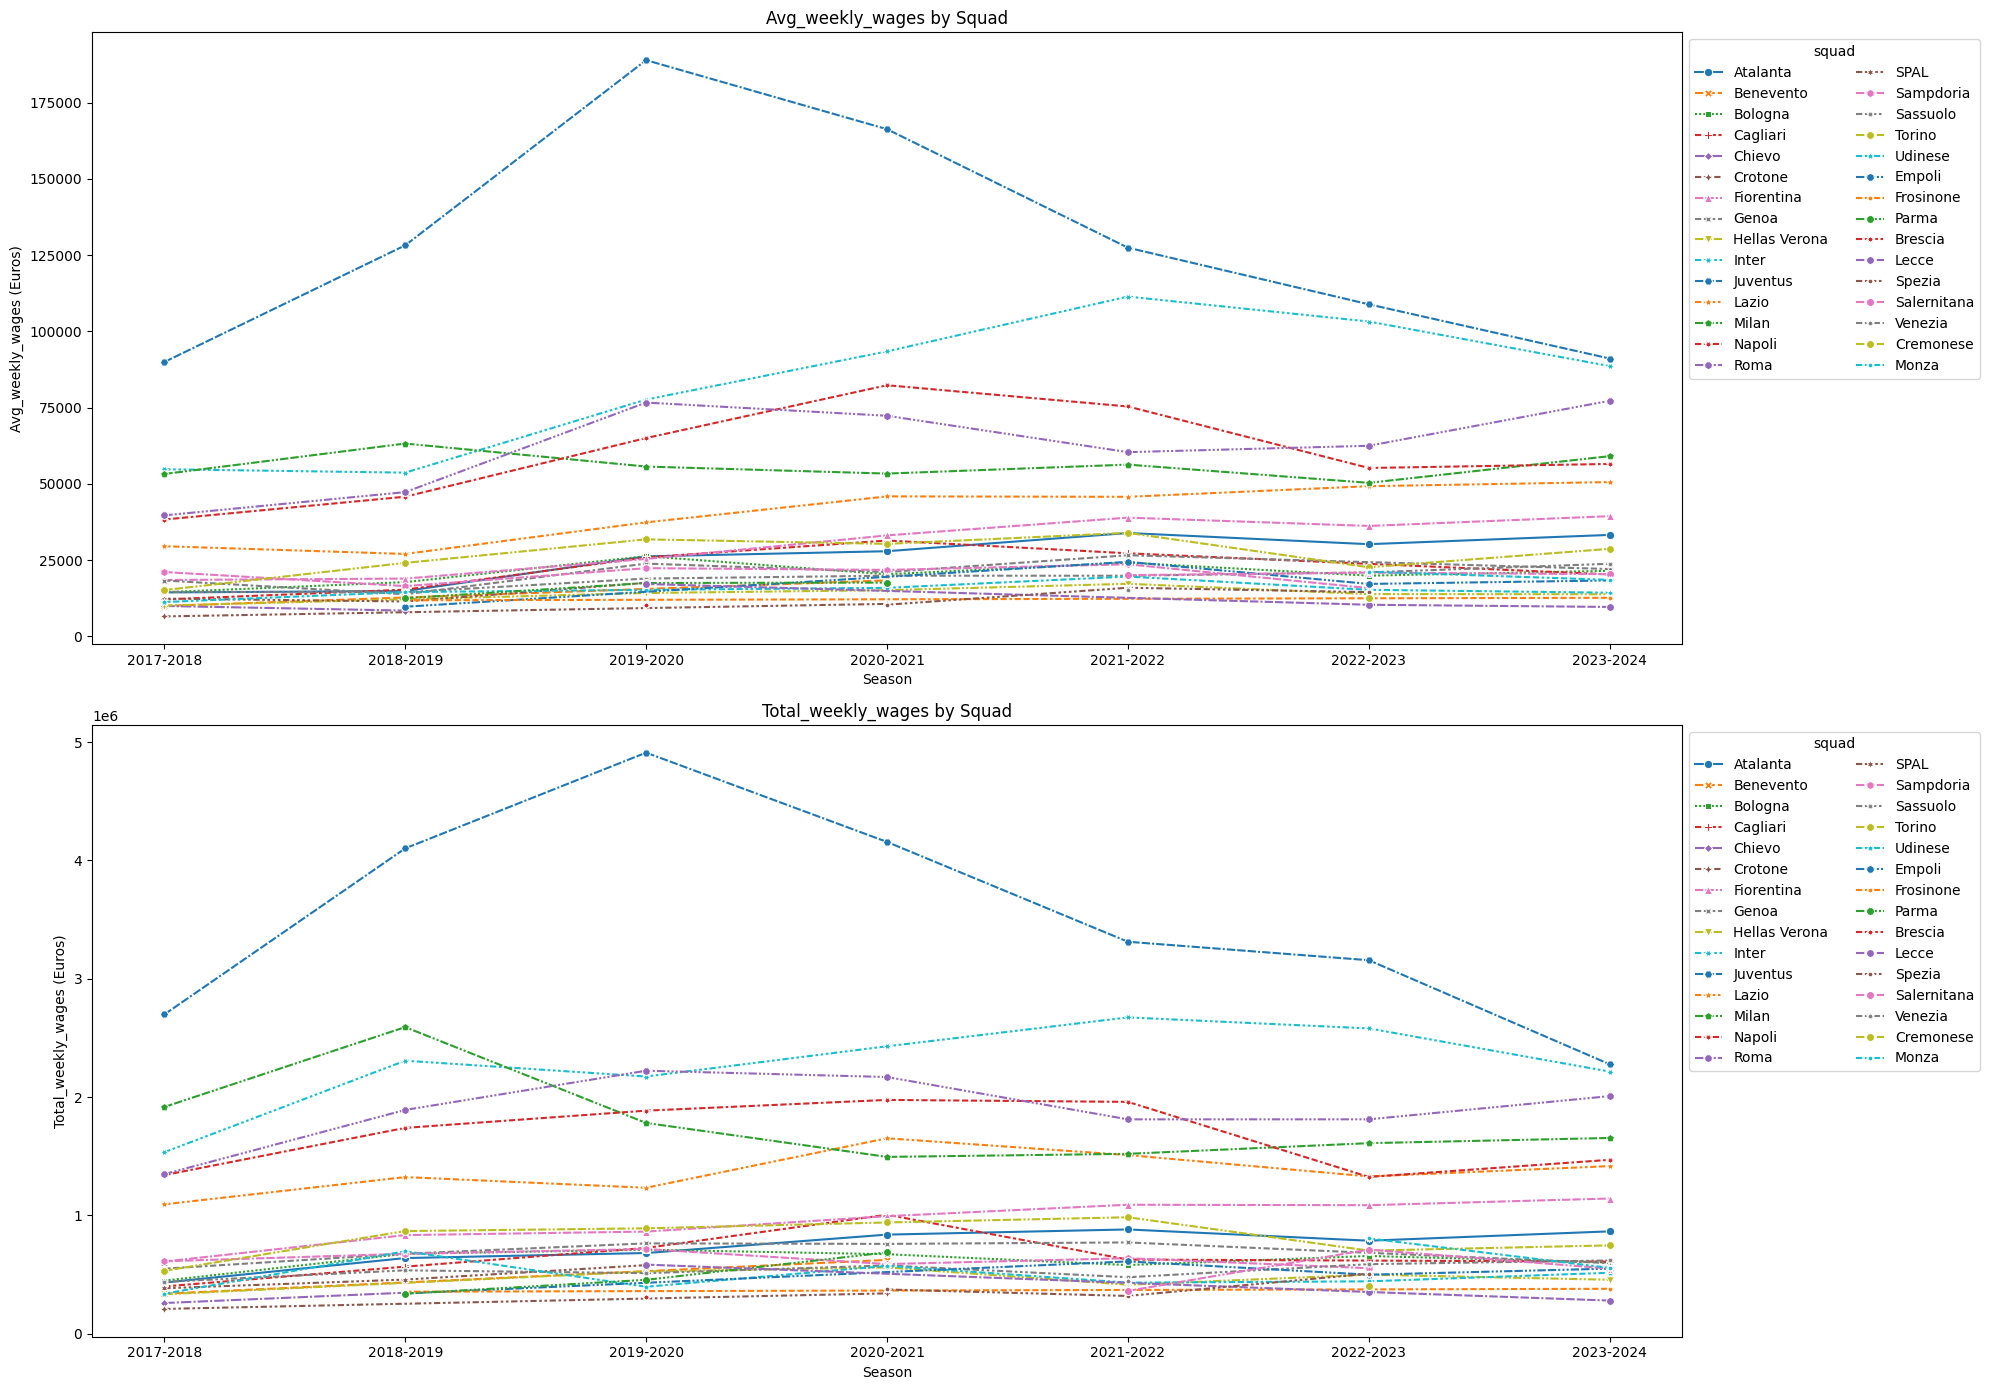

In [17]:
wage_plots.time_series('squad', figsize=(20,14))

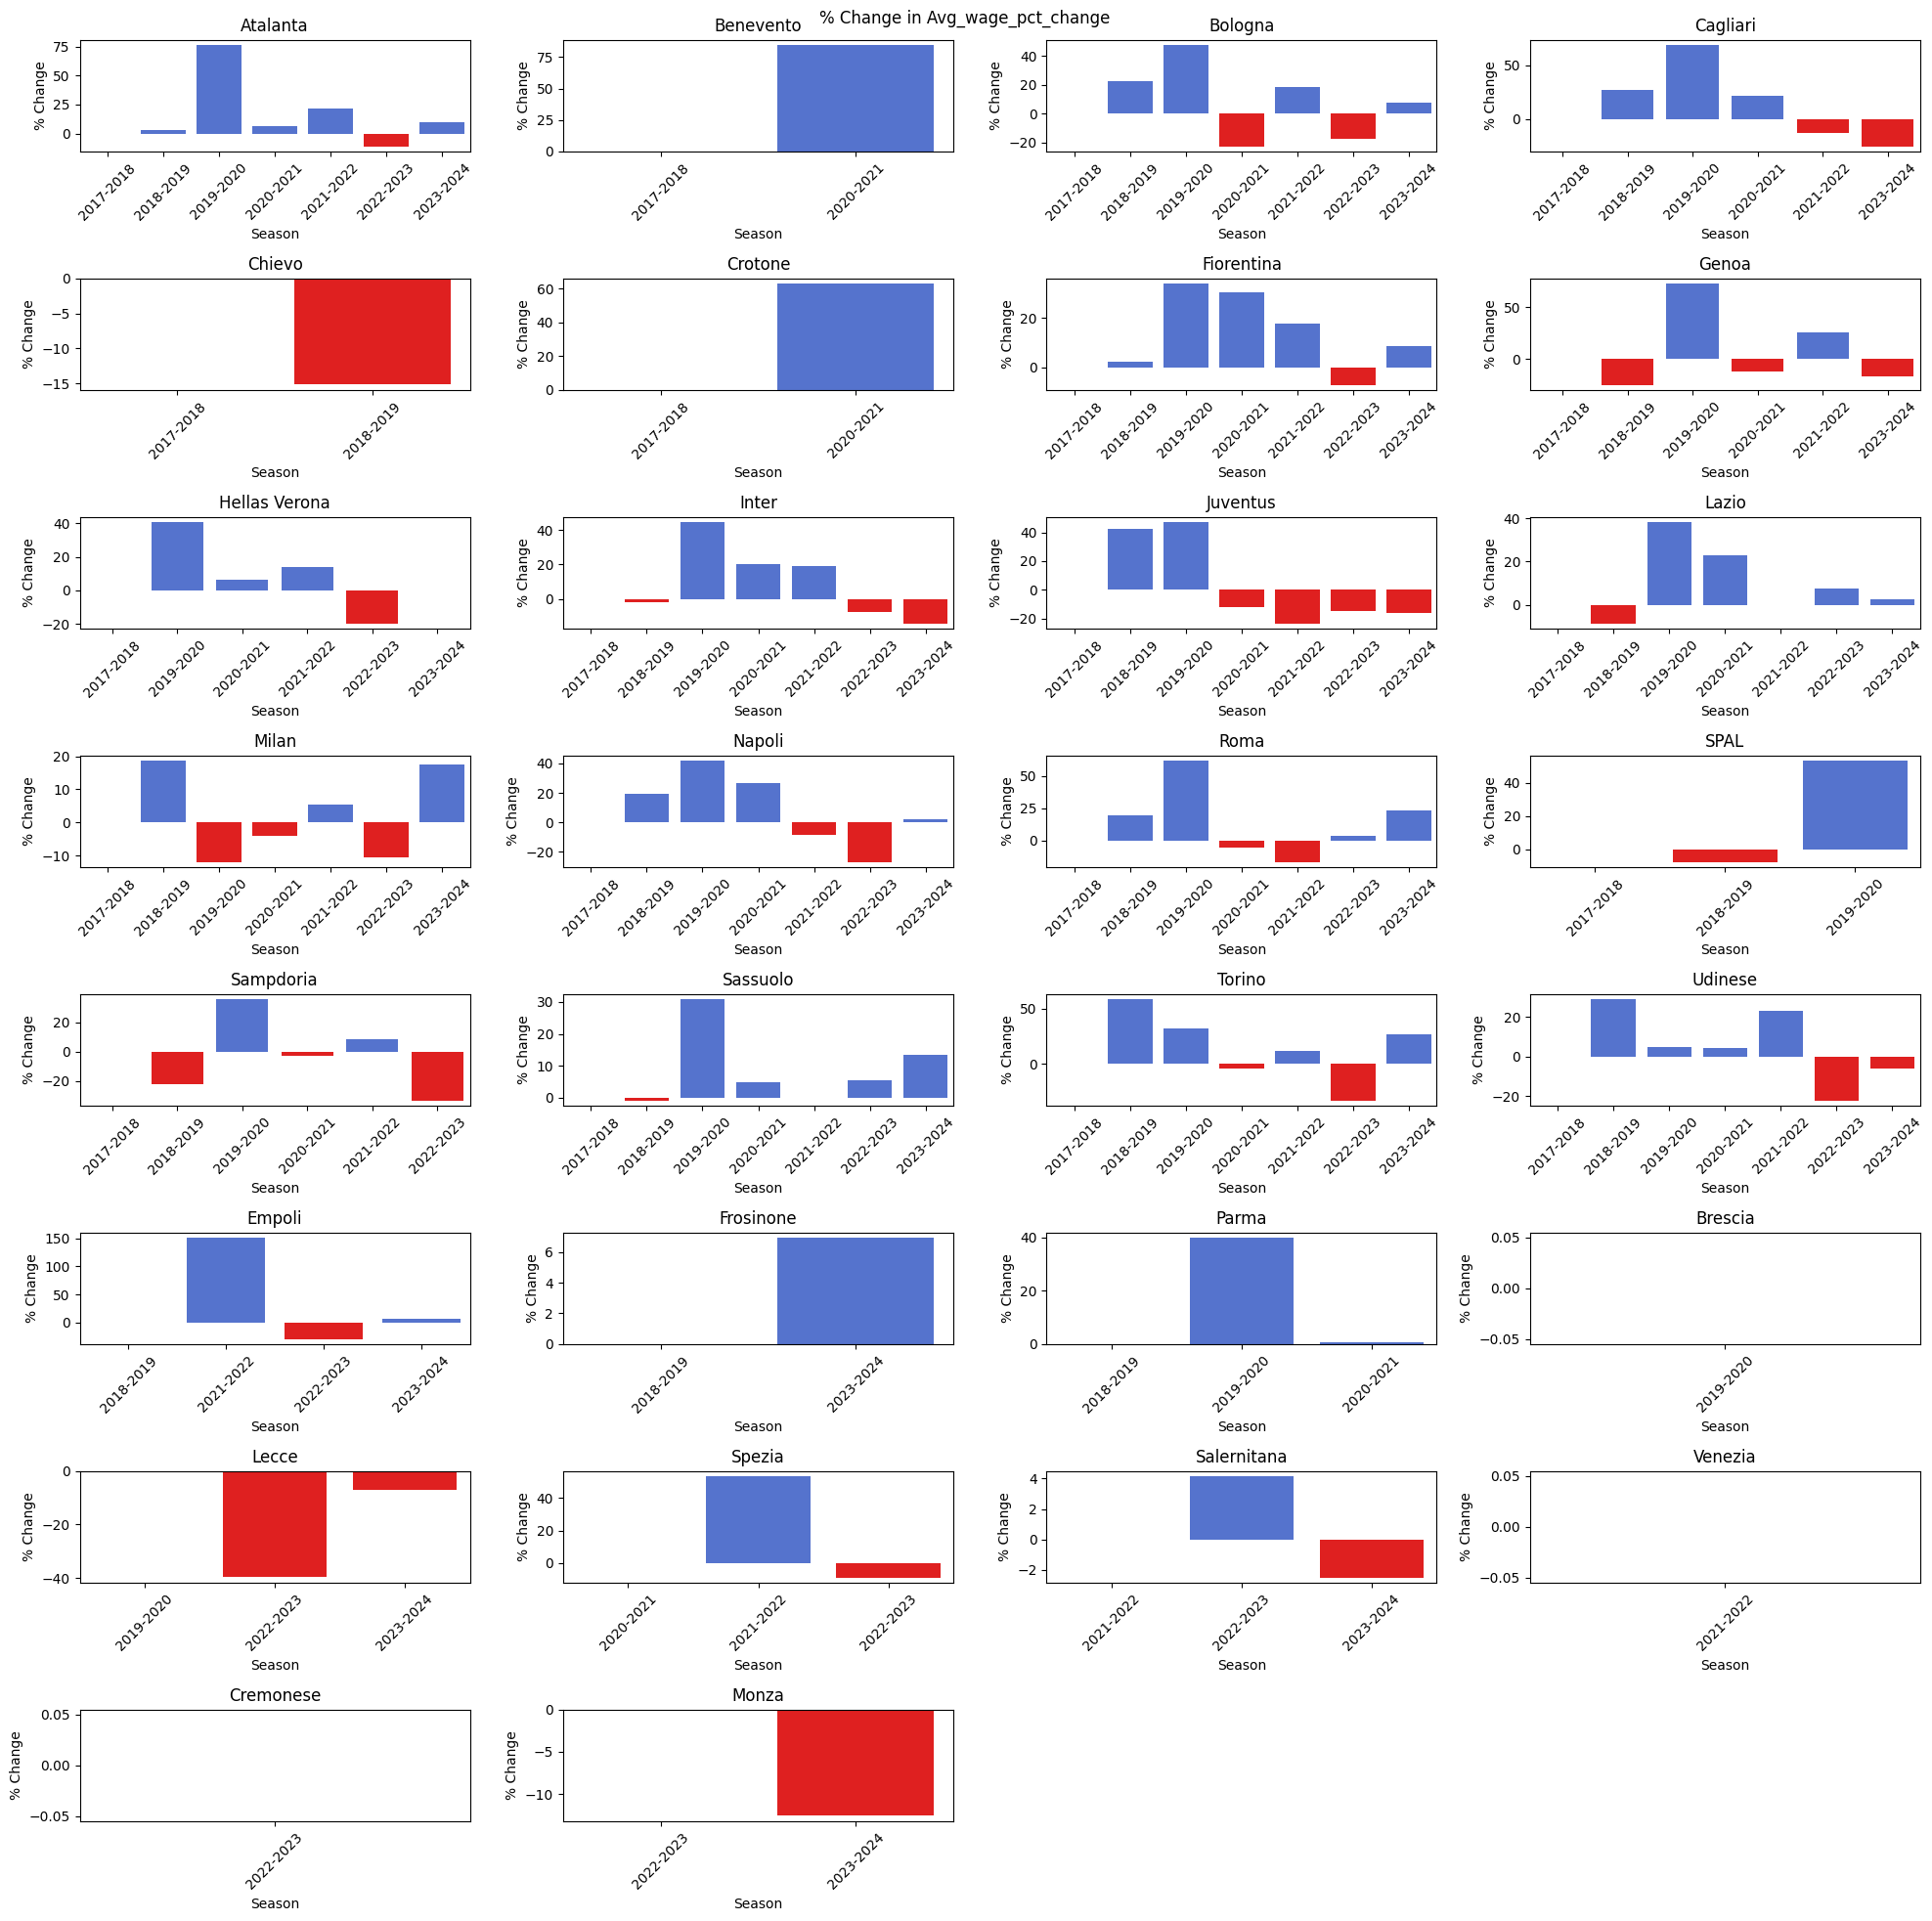

In [18]:
wage_plots.pct_change_plots('avg_wage_pct_change')

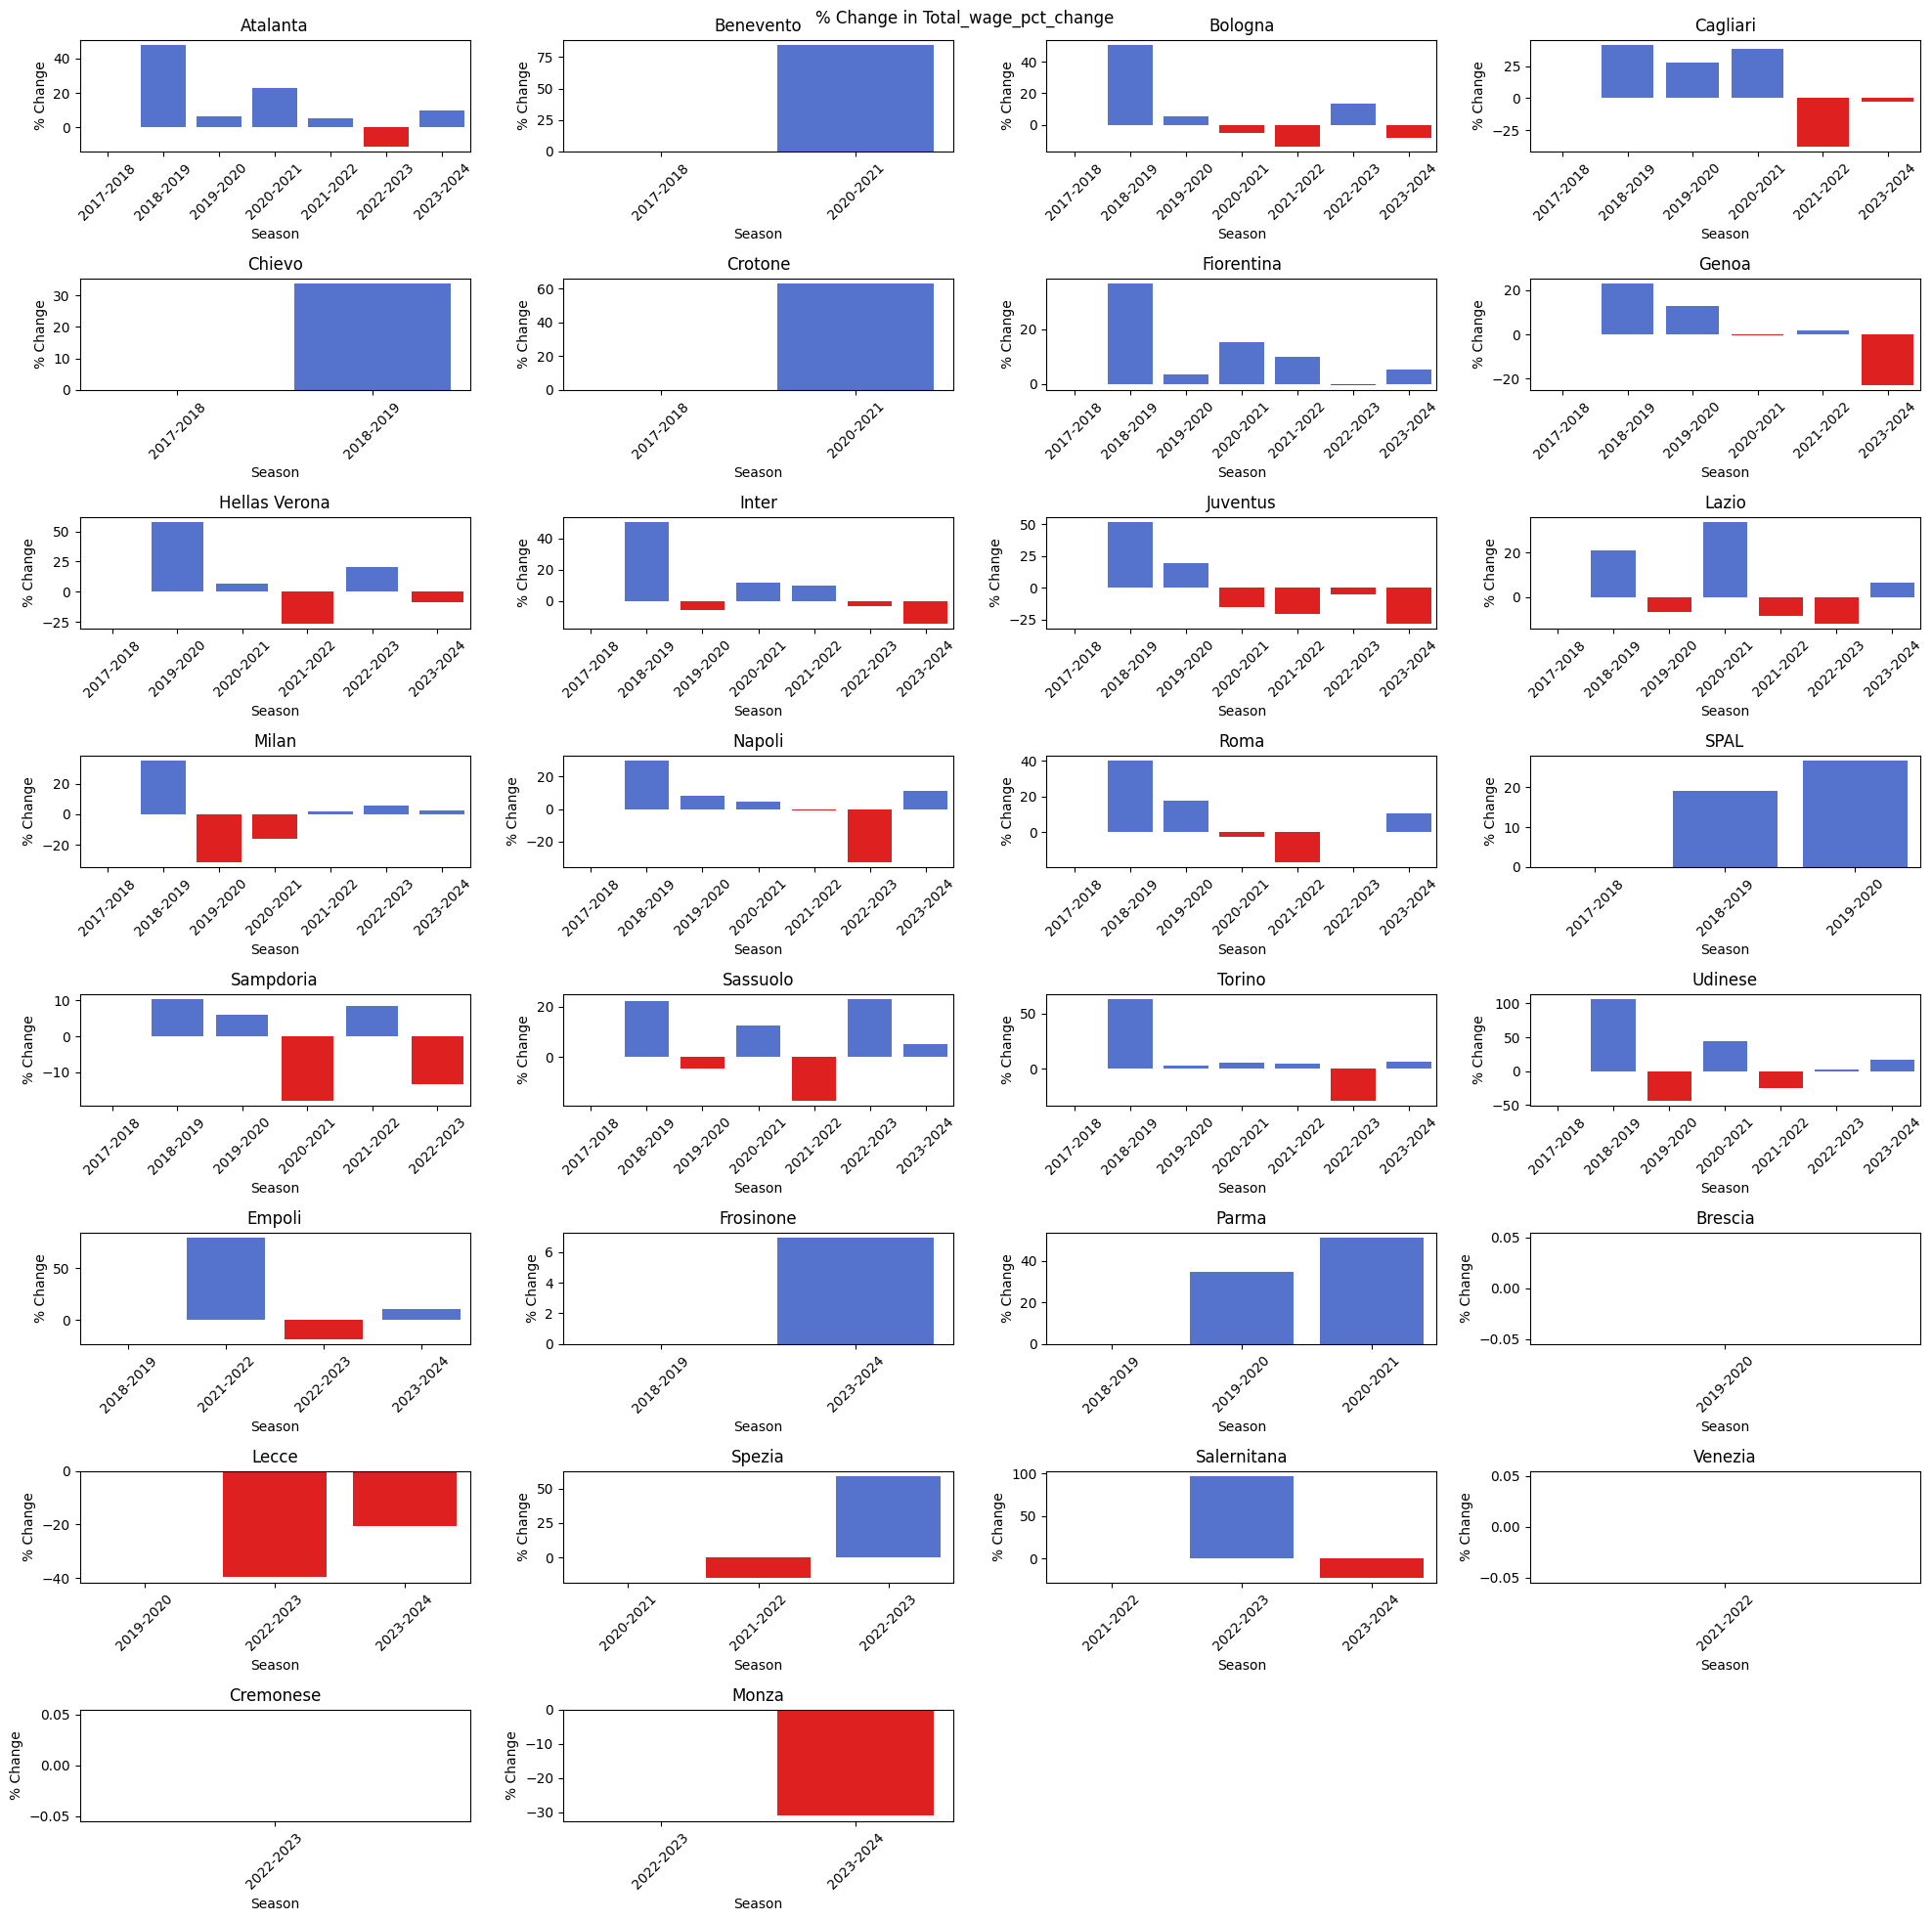

In [19]:
wage_plots.pct_change_plots('total_wage_pct_change')